### Importing Libraries

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_excel("bankruptcy-prevention.xlsx")

In [23]:
df

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


In [24]:
df.to_csv("bankruptcy.csv",index=False)

In [25]:
data=pd.read_csv("bankruptcy.csv",sep=";")
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [26]:
# Rename the column " class" to "class"
data.rename(columns={" class": "class"}, inplace=True)

# Verify the column names
print(data.columns)


Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class'],
      dtype='object')


### EDA Process

In [27]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6   class                   250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [29]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
class                     0
dtype: int64

In [31]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [32]:
data.shape

(250, 7)

In [33]:
data.size

1750

In [34]:
data.kurtosis()

industrial_risk          -1.521223
 management_risk         -1.378700
 financial_flexibility   -1.290455
 credibility             -1.545520
 competitiveness         -1.711286
 operating_risk          -1.624863
dtype: float64

In [35]:
data.skew()

industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

In [36]:
data.dropna()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [37]:
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
class                      object
dtype: object

In [39]:
# Convert target variable class to binary
data['class'] = data['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


In [40]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0
249,1.0,0.0,0.5,0.5,1.0,1.0,0


### Label Encoding

In [41]:
# Initialize the label encoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [42]:
# Encode the target variable
data['class'] = label_encoder.fit_transform(data['class'])

In [43]:
print(data.head())

   industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk  class  
0               0.0              0.5      1  
1               0.0              1.0      1  
2               0.0              1.0      1  
3               0.0              1.0      1  
4               0.0              1.0      1  


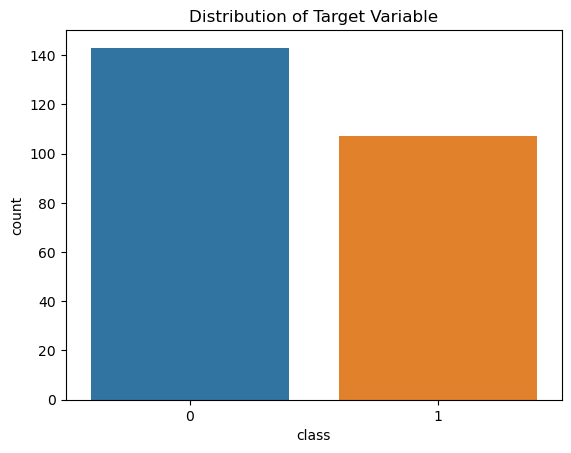

In [44]:
sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable')
plt.show()

### Remove outliers

In [45]:
# Remove outliers
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]
print(data.shape)

(250, 7)


In [46]:
z_scores

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.043827,0.941732,0.938172,1.132941,1.082310,0.161400,1.156049
1,1.261256,0.941732,0.938172,1.132941,1.082310,0.991457,1.156049
2,1.173601,1.497989,0.938172,1.132941,1.082310,0.991457,1.156049
3,0.043827,1.497989,0.938172,0.072315,1.082310,0.991457,1.156049
4,1.173601,0.941732,0.938172,1.132941,1.082310,0.991457,1.156049
...,...,...,...,...,...,...,...
245,1.261256,0.941732,1.556967,1.277572,1.191451,0.991457,0.865015
246,1.173601,0.941732,0.309397,1.277572,1.191451,1.314257,0.865015
247,1.261256,0.941732,1.556967,0.072315,0.054570,1.314257,0.865015
248,1.173601,1.497989,0.309397,1.277572,0.054570,1.314257,0.865015


In [47]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


### Standardize the data

In [48]:
# Standardize the data
scaler = StandardScaler()
scaler

StandardScaler()

In [49]:
features = data.drop(columns=['class'])
features

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [50]:
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.04382742,  0.94173236, -0.93817234, -1.13294134, -1.08231025,
        -0.16140004],
       [-1.26125562,  0.94173236, -0.93817234, -1.13294134, -1.08231025,
         0.9914574 ],
       [ 1.17360079, -1.49798878, -0.93817234, -1.13294134, -1.08231025,
         0.9914574 ],
       ...,
       [-1.26125562,  0.94173236,  1.55696687,  0.0723154 ,  0.05457026,
        -1.31425748],
       [ 1.17360079, -1.49798878,  0.30939726,  1.27757215,  0.05457026,
        -1.31425748],
       [ 1.17360079, -1.49798878,  0.30939726,  0.0723154 ,  1.19145078,
         0.9914574 ]])

In [51]:
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,-0.043827,0.941732,-0.938172,-1.132941,-1.082310,-0.161400
1,-1.261256,0.941732,-0.938172,-1.132941,-1.082310,0.991457
2,1.173601,-1.497989,-0.938172,-1.132941,-1.082310,0.991457
3,-0.043827,-1.497989,-0.938172,0.072315,-1.082310,0.991457
4,1.173601,0.941732,-0.938172,-1.132941,-1.082310,0.991457
...,...,...,...,...,...,...
245,-1.261256,0.941732,1.556967,1.277572,1.191451,0.991457
246,1.173601,0.941732,0.309397,1.277572,1.191451,-1.314257
247,-1.261256,0.941732,1.556967,0.072315,0.054570,-1.314257
248,1.173601,-1.497989,0.309397,1.277572,0.054570,-1.314257


In [52]:
scaled_data['class'] = data['class'].values
scaled_data['class']

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: class, Length: 250, dtype: int64

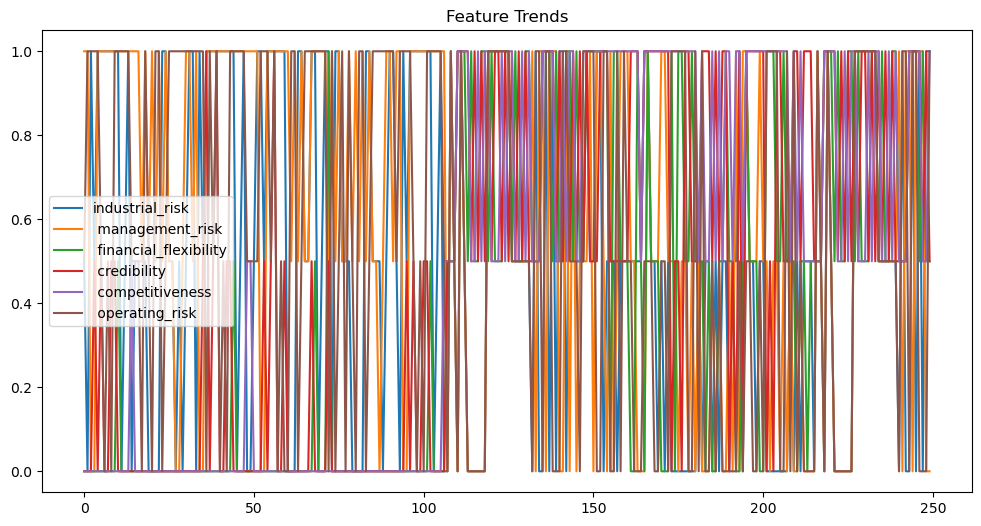

In [53]:
# Check stationarity (not typically needed for classification)
plt.figure(figsize=(12, 6))
for column in features.columns:
    plt.plot(data[column], label=column)
plt.title('Feature Trends')
plt.legend()
plt.show()

### Visualizations

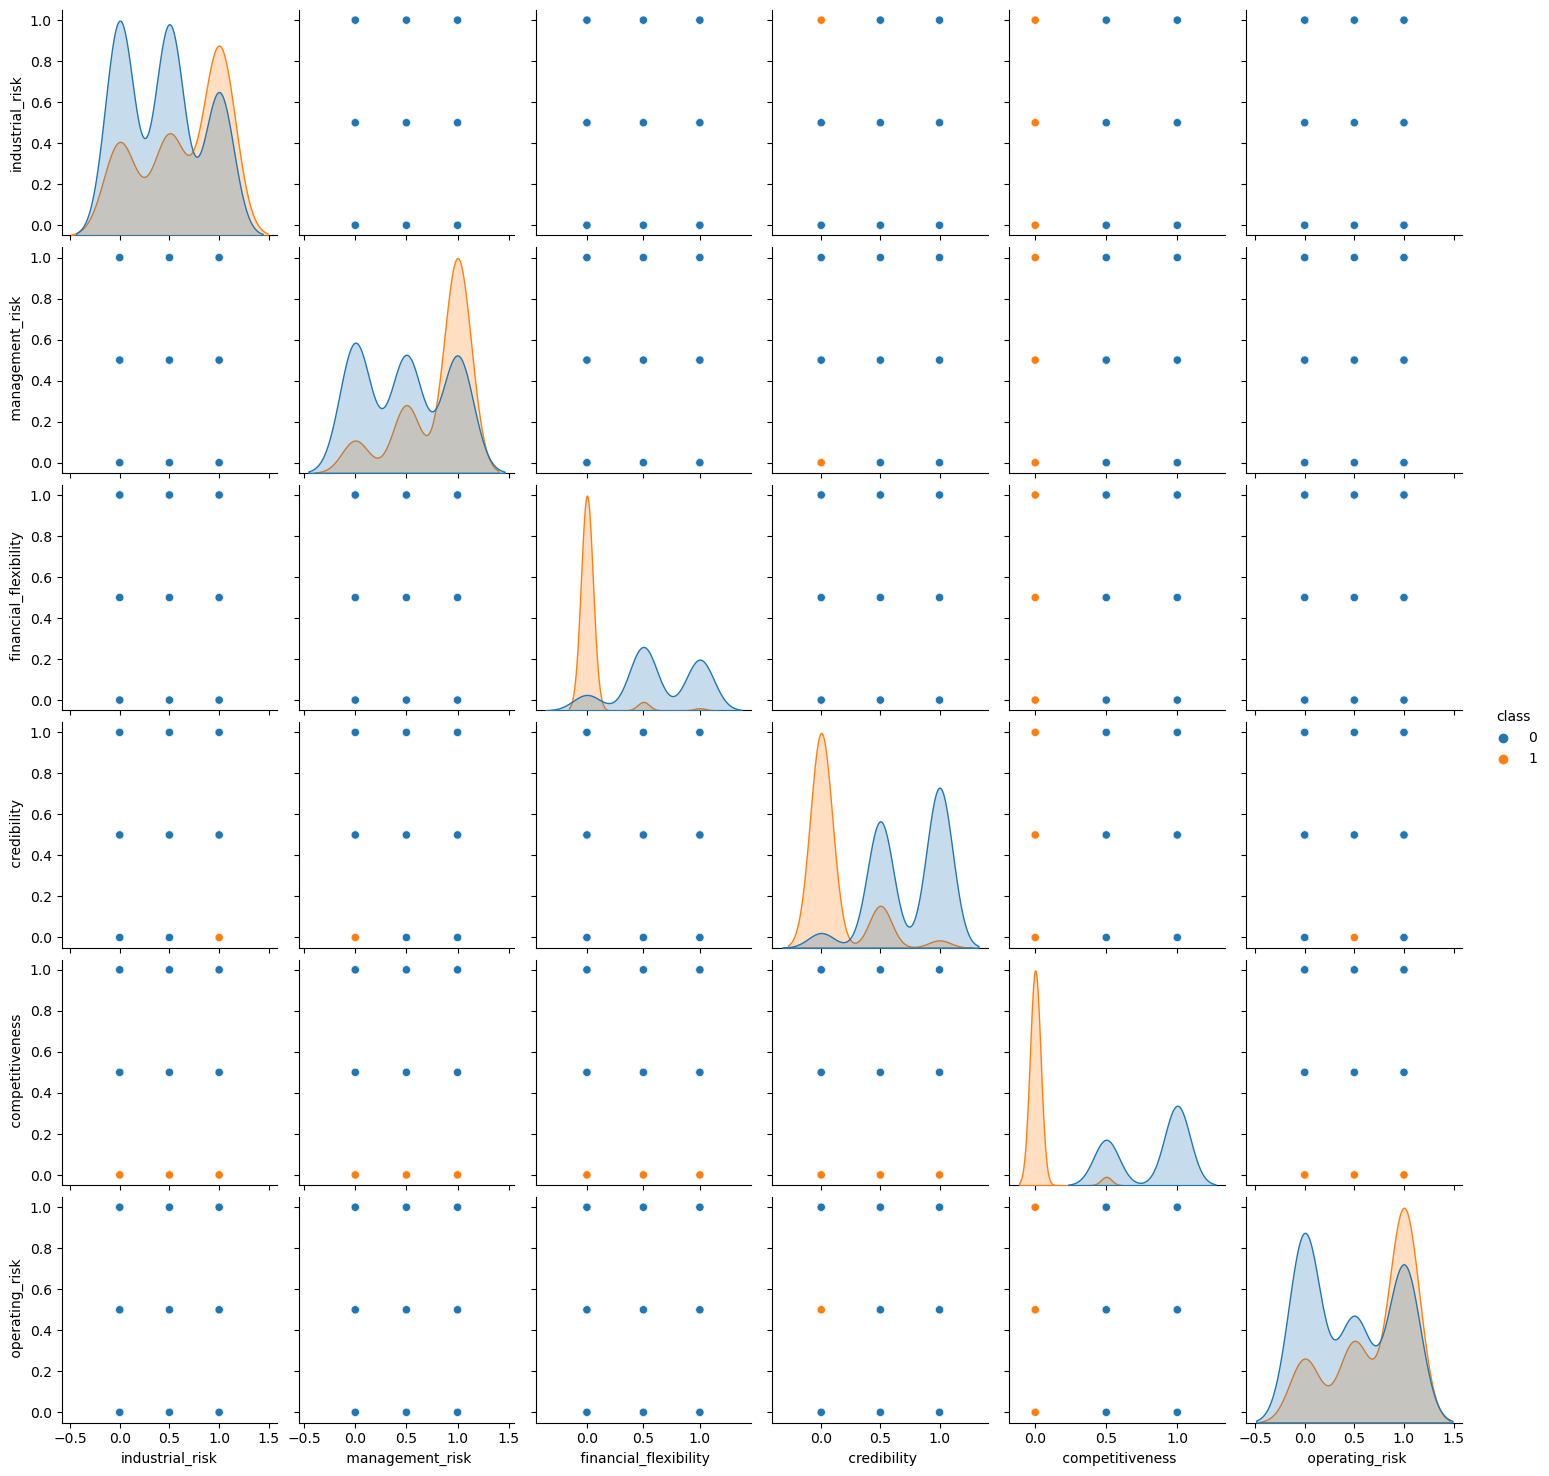

In [54]:
# Visualizations
sns.pairplot(data, hue='class')
plt.show()

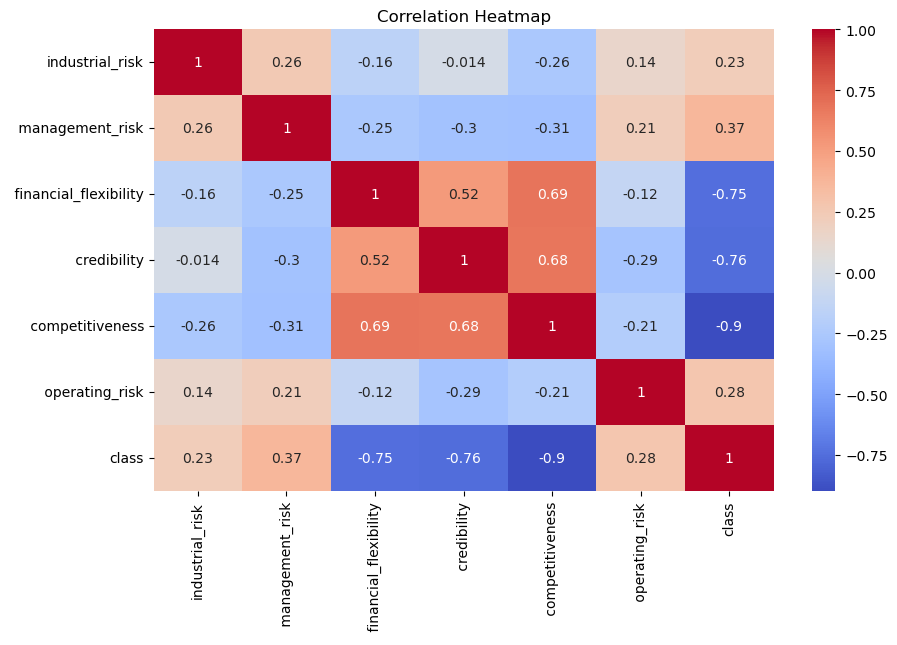

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: ylabel='Density'>

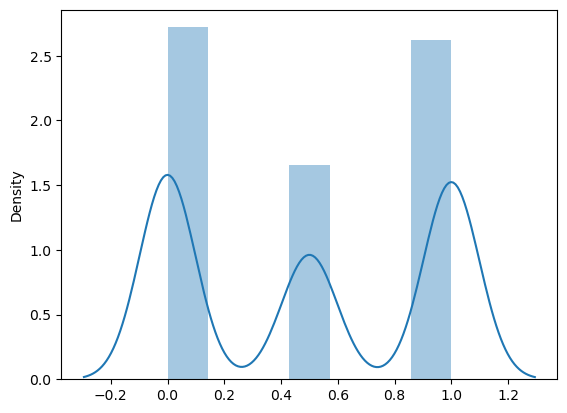

In [56]:
sns.distplot(data)

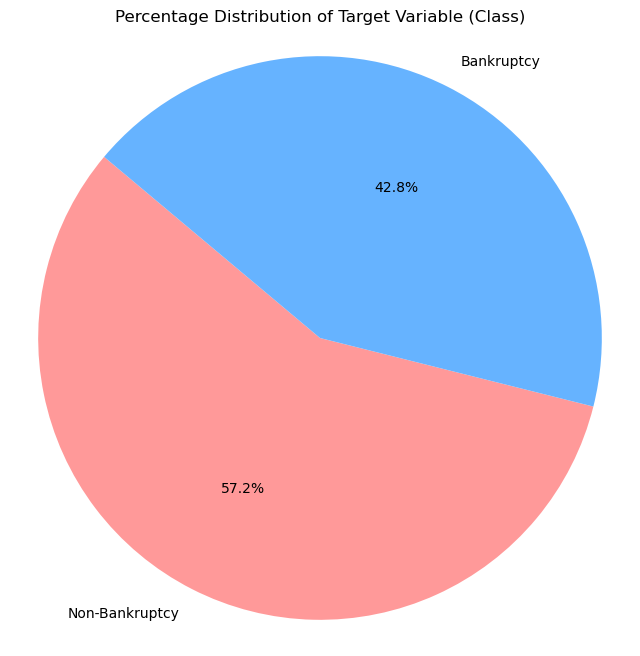

In [57]:
# Pie chart
class_counts = data['class'].value_counts()
class_labels = ['Non-Bankruptcy', 'Bankruptcy']
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Percentage Distribution of Target Variable (Class)')
plt.axis('equal')
plt.show()

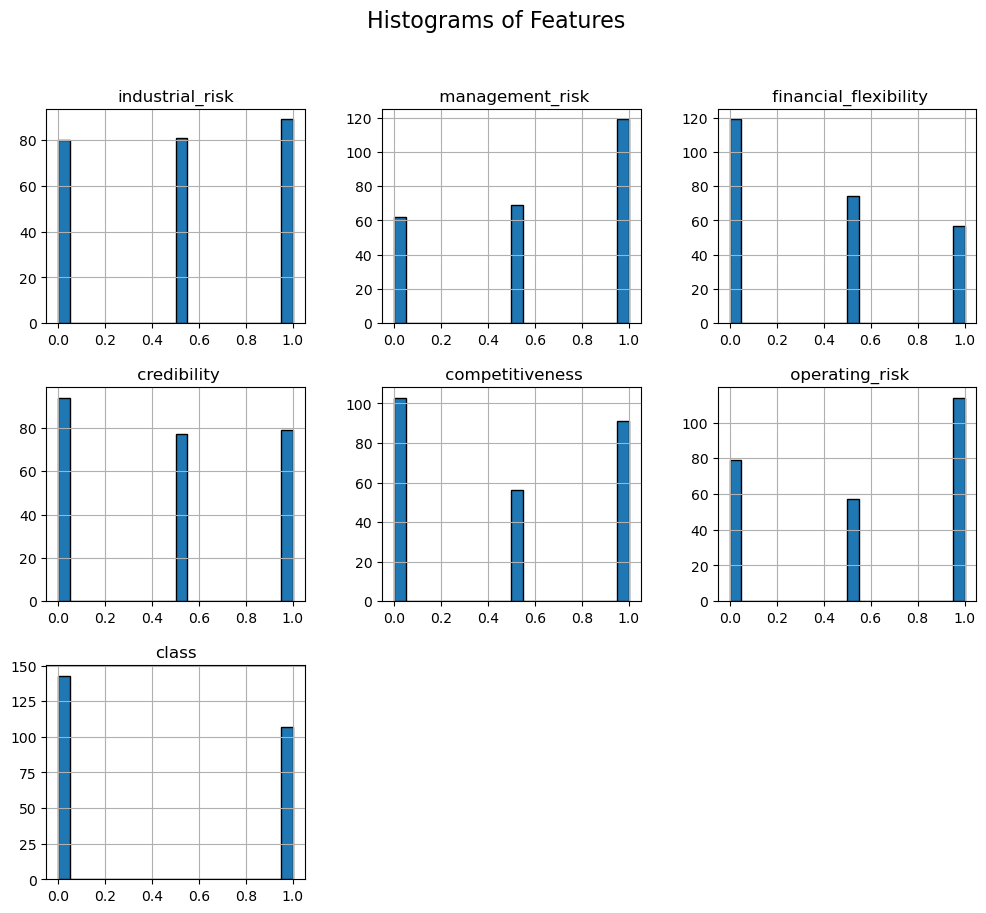

In [58]:
# Histogram
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

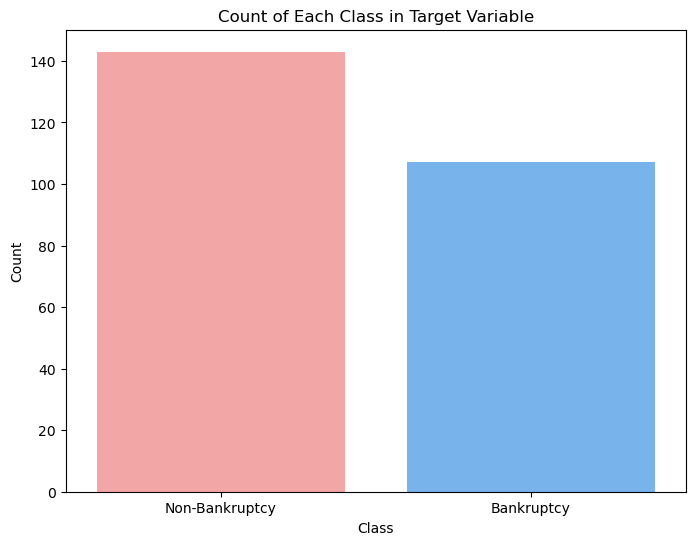

In [59]:
# Bar chart
class_counts = data['class'].value_counts()
class_labels = ['Non-Bankruptcy', 'Bankruptcy']
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['#ff9999','#66b3ff'])
plt.xticks([0, 1], class_labels)
plt.title('Count of Each Class in Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

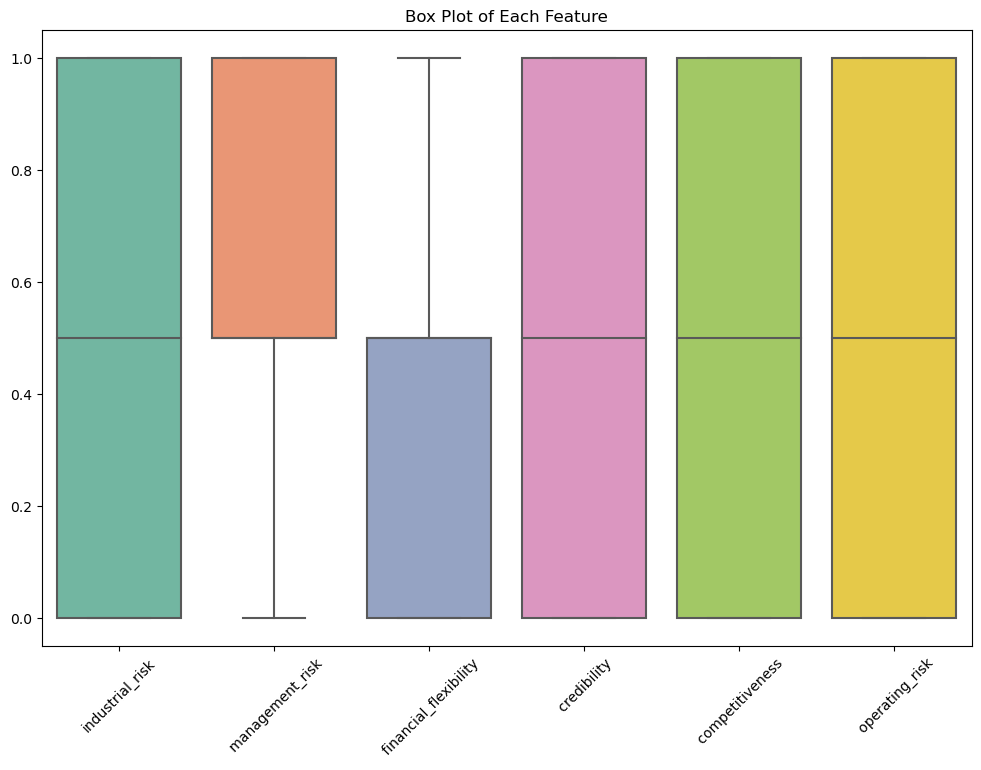

In [60]:
# Box plot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['class']), palette='Set2')
plt.title('Box Plot of Each Feature')
plt.xticks(rotation=45)
plt.show()

### Model Building

In [61]:
X = scaled_data.drop(columns=['class'])
y = scaled_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,-0.043827,0.941732,-0.938172,-1.132941,-1.082310,-0.161400
1,-1.261256,0.941732,-0.938172,-1.132941,-1.082310,0.991457
2,1.173601,-1.497989,-0.938172,-1.132941,-1.082310,0.991457
3,-0.043827,-1.497989,-0.938172,0.072315,-1.082310,0.991457
4,1.173601,0.941732,-0.938172,-1.132941,-1.082310,0.991457
...,...,...,...,...,...,...
245,-1.261256,0.941732,1.556967,1.277572,1.191451,0.991457
246,1.173601,0.941732,0.309397,1.277572,1.191451,-1.314257
247,-1.261256,0.941732,1.556967,0.072315,0.054570,-1.314257
248,1.173601,-1.497989,0.309397,1.277572,0.054570,-1.314257


In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: class, Length: 250, dtype: int64

In [64]:
X_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
132,-1.261256,0.941732,0.309397,0.072315,0.054570,-1.314257
225,-1.261256,-1.497989,1.556967,1.277572,0.054570,-1.314257
238,-0.043827,-0.278128,1.556967,1.277572,0.054570,-0.161400
119,1.173601,0.941732,0.309397,1.277572,1.191451,0.991457
136,1.173601,-1.497989,1.556967,1.277572,1.191451,0.991457
...,...,...,...,...,...,...
106,-1.261256,0.941732,-0.938172,-1.132941,0.054570,-0.161400
14,-1.261256,0.941732,-0.938172,-1.132941,0.054570,-0.161400
92,-0.043827,0.941732,-0.938172,-1.132941,-1.082310,-0.161400
179,-1.261256,-0.278128,1.556967,0.072315,1.191451,-1.314257


In [65]:
X_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
142,-1.261256,0.941732,1.556967,1.277572,0.054570,0.991457
6,1.173601,0.941732,-0.938172,-1.132941,-1.082310,-1.314257
97,1.173601,0.941732,-0.938172,0.072315,-1.082310,-0.161400
60,-1.261256,0.941732,-0.938172,-1.132941,-1.082310,-1.314257
112,-0.043827,-0.278128,1.556967,1.277572,1.191451,-0.161400
181,-0.043827,-0.278128,0.309397,0.072315,0.054570,-1.314257
197,-0.043827,-0.278128,0.309397,1.277572,1.191451,-1.314257
184,-0.043827,-1.497989,0.309397,1.277572,0.054570,-1.314257
9,1.173601,0.941732,-0.938172,0.072315,-1.082310,0.991457
104,-0.043827,0.941732,-0.938172,-1.132941,-1.082310,0.991457


In [66]:
y_train

132    0
225    0
238    0
119    0
136    0
      ..
106    1
14     1
92     1
179    0
102    1
Name: class, Length: 200, dtype: int64

In [67]:
y_test

142    0
6      1
97     1
60     1
112    0
181    0
197    0
184    0
9      1
104    1
200    0
216    0
236    0
240    0
67     1
224    0
194    0
15     1
177    0
24     1
247    0
19     1
114    0
68     1
176    0
45     1
55     1
10     1
30     1
120    0
201    0
33     1
141    0
219    0
25     1
111    0
18     1
196    0
180    0
159    0
118    0
96     1
108    0
185    0
222    0
16     1
146    0
69     1
173    0
38     1
Name: class, dtype: int64

### Logistic Regression Model

In [68]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_cv.fit(X_train, y_train)
y_pred_log_reg_cv = log_reg_cv.predict(X_test)

In [69]:
log_reg

LogisticRegression()

In [70]:
log_reg_params

{'C': [0.01, 0.1, 1, 10, 100]}

In [71]:
log_reg_cv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [72]:
y_pred_log_reg_cv

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

### Random Forest Classifier

In [73]:
rf_clf = RandomForestClassifier()
rf_clf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_clf_cv = GridSearchCV(rf_clf, rf_clf_params, cv=5)
rf_clf_cv.fit(X_train, y_train)
y_pred_rf_cv = rf_clf_cv.predict(X_test)

In [74]:
rf_clf

RandomForestClassifier()

In [75]:
rf_clf_params

{'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

In [76]:
rf_clf_cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]})

In [77]:
y_pred_rf_cv

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

### Support Vector Classifier

In [78]:
svc_clf = SVC()
svc_clf_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svc_clf_cv = GridSearchCV(svc_clf, svc_clf_params, cv=5)
svc_clf_cv.fit(X_train, y_train)
y_pred_svc_cv = svc_clf_cv.predict(X_test)

In [79]:
svc_clf

SVC()

In [80]:
svc_clf_params

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [81]:
svc_clf_cv

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [82]:
y_pred_svc_cv 

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

### XGBoost

In [83]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_clf_cv = GridSearchCV(xgb_clf, xgb_clf_params, cv=5)
xgb_clf_cv.fit(X_train, y_train)
y_pred_xgb_cv = xgb_clf_cv.predict(X_test)

### Model Evaluation

In [84]:
print("Logistic Regression Best Params:", log_reg_cv.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg_cv))
print(classification_report(y_test, y_pred_log_reg_cv))
print(confusion_matrix(y_test, y_pred_log_reg_cv))

Logistic Regression Best Params: {'C': 0.01}
Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[29  0]
 [ 0 21]]


In [85]:
print("Random Forest Best Params:", rf_clf_cv.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf_cv))
print(confusion_matrix(y_test, y_pred_rf_cv))

Random Forest Best Params: {'max_depth': 20, 'n_estimators': 50}
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[29  0]
 [ 0 21]]


In [86]:
print("SVC Best Params:", svc_clf_cv.best_params_)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc_cv))
print(classification_report(y_test, y_pred_svc_cv))
print(confusion_matrix(y_test, y_pred_svc_cv))

SVC Best Params: {'C': 1, 'gamma': 0.01}
SVC Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[29  0]
 [ 0 21]]


In [87]:
print("XGBoost Best Params:", xgb_clf_cv.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_cv))
print(classification_report(y_test, y_pred_xgb_cv))
print(confusion_matrix(y_test, y_pred_xgb_cv))

XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[29  0]
 [ 0 21]]


In [88]:
# Model Evaluation
models = {
    "Logistic Regression": log_reg_cv,
    "Random Forest": rf_clf_cv,
    "SVC": svc_clf_cv,
    "XGBoost": xgb_clf_cv
}

In [89]:
models

{'Logistic Regression': GridSearchCV(cv=5, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 0.1, 1, 10, 100]}),
 'Random Forest': GridSearchCV(cv=5, estimator=RandomForestClassifier(),
              param_grid={'max_depth': [None, 10, 20, 30],
                          'n_estimators': [50, 100, 200]}),
 'SVC': GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [0.1, 1, 10, 100],
                          'gamma': [1, 0.1, 0.01, 0.001]}),
 'XGBoost': GridSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=Non

In [90]:
results = []

In [91]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Best Params": model.best_params_,
        "Accuracy": accuracy,
        "F1 Score": f1
    })

In [92]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model                                        Best Params  \
0  Logistic Regression                                        {'C': 0.01}   
1        Random Forest              {'max_depth': 20, 'n_estimators': 50}   
2                  SVC                            {'C': 1, 'gamma': 0.01}   
3              XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

   Accuracy  F1 Score  
0       1.0       1.0  
1       1.0       1.0  
2       1.0       1.0  
3       1.0       1.0  


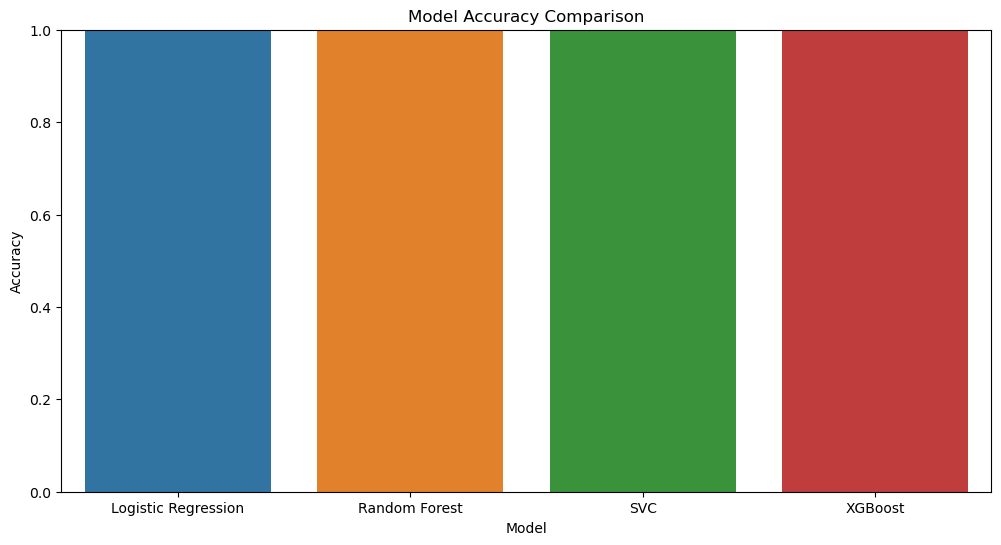

In [93]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

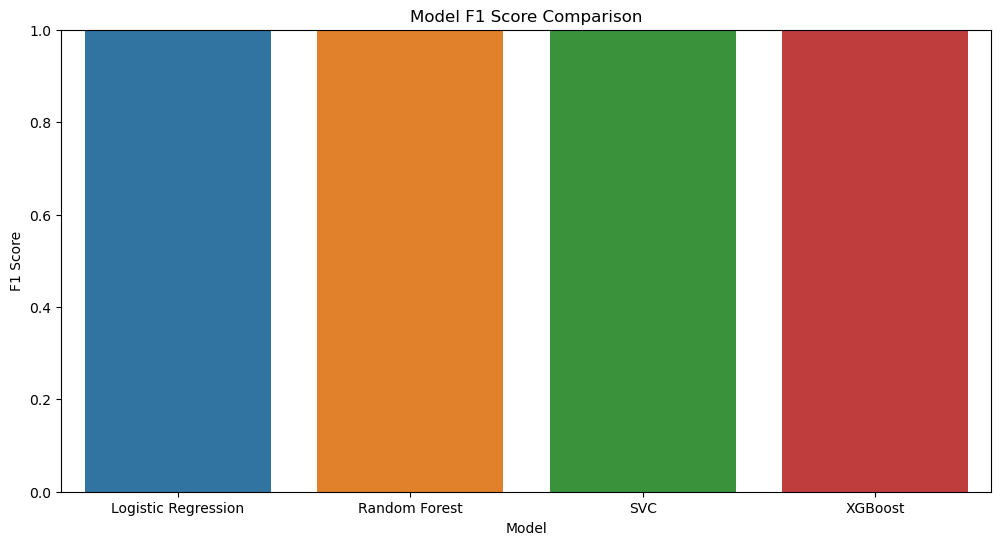

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('Model F1 Score Comparison')
plt.ylim(0, 1)
plt.show()

In [97]:
import pickle

# Assuming results_df contains the performance metrics of the models
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"Best Model: {best_model_name}")

# Map the model names to the actual models
model_mapping = {
    "Logistic Regression": log_reg_cv,
    "Random Forest": rf_clf_cv,
    "SVC": svc_clf_cv,
    "XGBoost": xgb_clf_cv
}

# Get the best model
best_model = model_mapping[best_model_name]

# Save the best model using pickle
filename = 'Trained_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

# Load the saved model to verify
loaded_model = pickle.load(open(filename, 'rb'))
print(f"Loaded Model: {loaded_model}")


Best Model: Logistic Regression
Loaded Model: GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})
